#**Aivle 스쿨 지원 질문, 답변 챗봇 만들기**
# 단계1 : 데이터 탐색 및 전처리

## 0.미션

* 1) 데이터 탐색
    * intent 별 질문 개수 분포 확인하기
    * 질문 별 문장길이의 분포 확인하기
    * 대화 유형(type) 별 문장길이 분포 비교하기
    * 그 외 필요하다고 판단되는 부분에 대해 데이터를 탐색하고 분석하기
* 2) 전처리
    * 기본 전처리 : 데이터를 불러온 후 다음의 전처리를 먼저 수행합니다.
        * 한글 칼럼이름을 영문이름으로 변경하기
        * 두 데이터셋을 하나로 통합하기
        * intent 번호를 통합된 번호로 만들기
        * 일상대화와 Q&A 대화를 구분하는 구분자 칼럼 추가하기
    * 학습을 위한 전처리 : 자연어 처리를 위한 전처리를 수행합니다.
        * 형태소 분석기를 활용하여 문장 어절들에 대해 형태소로 변환합니다.
    * 전처리 결과를 저장합니다. 

## 1.환경준비

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.
    - 로컬 / 구글드라이브 를 통해 데이터를 로딩합니다.

### (1) 라이브러리 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,122 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26527985 sha256=2ecfccb4f4c917568b7a967921791524bee96131de497c356d509e94981ef647
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
import os
import matplotlib.font_manager as fm
import random
from sklearn.model_selection import train_test_split

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### (2) 데이터 로딩
* 주어진 데이터셋
    * 학습 데이터 : 챗봇 데이터.xls
    * 학습 데이터 : 일상대화.xls
    * 엑셀 파일이므로 pd.read_excel 함수를 이용해서 불러 옵니다.
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
        * 제공된 압축파일을 다운받아 압축을 풀고
        * anaconda의 root directory(보통 C:\Users\<ID> 에 project 폴더를 만들고, 복사해 넣습니다.
    * 2) 구글코랩
        * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
        * 데이터 파일을 복사해 넣습니다.

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/AIVLE/4월/mini6'

### 3) 데이터 읽어오기

In [ ]:
# 일상대화
common_df = pd.read_excel(path+"/일상대화.xlsx")

# 에이블스쿨 질문답변
faq_df = pd.read_excel(path+"/챗봇데이터.xlsx")


* 데이터 둘러보기

In [ ]:
print(common_df.describe())

           intent
count  506.000000
mean    15.310277
std      9.241136
min      1.000000
25%      8.000000
50%     14.500000
75%     23.000000
max     30.000000


In [ ]:
common_df.head()

,intent,질문,답변
0,1,떨어뜨려서 핸드폰 액정 나갔어,as 맡기세요.
1,1,액정 나갔어,as 맡기세요.
2,1,핸드폰 떨어뜨려서 고장 났나봐,as 맡기세요.
3,1,노트북이 작동이 안되네,AS센터에 맡겨보세요.
4,1,노트북 키보드가 안먹히네,AS센터에 맡겨보세요.


In [ ]:
print('Q values: \n', common_df['질문'].value_counts())
print('\nA values: \n', common_df['답변'].value_counts())

Q values: 
 돈 많은 백수하고 싶어                    2
비 맞아서 옷 젖었어                     2
코 막혀                            2
추워죽겠다                           2
추워 죽을 뻔했네                       2
오늘 생각보다 춥네                      2
얼어죽는 줄 알았어                      2
얼어 죽는 줄                         2
아놔 코 막혀                         2
생각보다 오늘 너무 춥네                   2
바람이 너무 많이 부네                    2
바람 많이 부네                        2
동상 걸릴 뻔했어                       2
코맹맹                             2
열나고 아파                          2
옷이 다 젖었어                        2
동상 걸릴거 같아.                      2
속 메슥거려                          1
접촉사고 났어                         1
불 날 뻔했어                         1
불 날 뻔                           1
무서워서 뛰어 왔어                      1
무서워서 달려왔어                       1
모기가 웽웽거려.                       1
모기가 너무 많아.                      1
넘어질뻔했어                          1
길이 얼어서 미끄러질뻔했어                  1
길이 미끄러워서 미끄러질뻔했어                1
뒤차랑 박았어                         1
앞차

In [ ]:
print(faq_df.describe())

           intent
count  792.000000
mean     9.746212
std      6.827103
min      0.000000
25%      3.000000
50%     10.000000
75%     15.000000
max     22.000000


In [ ]:
faq_df.head()

,intent,Q,A
0,0,어떤 조건을 만족하면 지원할 수 있는지 알고 싶어요.,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...
1,0,지원자격이 어떻게 되나요?,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...
2,0,지원 조건이 궁금해요.,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...
3,0,지원 자격에 대해서 알려주세요.,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...
4,0,지원 자격 기준이 있나요?,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...


In [ ]:
print('Q values: \n', faq_df['Q'].value_counts())
print('\nA values: \n', faq_df['A'].value_counts())

Q values: 
 추가 합격제도와 관련해서 궁금한 사항이 있으면 어디에 문의해야 하나요?                                                                                            2
군복무자가 교육을 받으려면 별도의 신청 절차가 필요한가요?                                                                                                   2
군복무 중인 경우, 교육 지원 대상 여부는 입영 전/후, 전역 전/후에 따라 다를까요?                                                                                   2
어떤 조건을 만족하면 지원할 수 있는지 알고 싶어요.                                                                                                      1
시간이 겹치지 않는다면, 다른 교육과 같이 들어도 되나요?                                                                                                   1
비대면 교육도 실시간으로 진행되나요?                                                                                                               1
비대면 교육은 원하는 시간에 참여해도 되나요?                                                                                                          1
비대면 교육은 원하는 시간대에 참여해도 되나요?                               

## 2.데이터 탐색하기


* **세부 요구사항**
    * 데이터에 대한 기본 전처리를 수행합니다.
        * (필요시)한글 칼럼명을 영문명으로 변경, 
        * 두 데이터셋 하나로 통합
        * 일상대화와 지원Q&A를 구분할 대화유형(type)칼럼 생성
    * 데이터 탐색하기
        * intent별 질문 수 확인
        * 각 질문별 문장길이에 대한 분포 확인
        * 대화유형(type)별 문장길이 분포 확인
        * 그외, 필요하다고 생각되는 탐색적 분석 수행

### (1) 데이터 기본 전처리

#### 1) column이름 통일하기(선택사항)
* 필수는 아니지만, 한글 칼럼명을 영문으로 변경합니다.

In [ ]:
# common_df의 컬럼 이름을 변경합니다. '질문'을 'Q'로, '답변'을 'A'로 변경
common_df.rename(columns={'질문': 'Q', '답변': 'A'}, inplace=True)
common_df.head()

,intent,Q,A
0,1,떨어뜨려서 핸드폰 액정 나갔어,as 맡기세요.
1,1,액정 나갔어,as 맡기세요.
2,1,핸드폰 떨어뜨려서 고장 났나봐,as 맡기세요.
3,1,노트북이 작동이 안되네,AS센터에 맡겨보세요.
4,1,노트북 키보드가 안먹히네,AS센터에 맡겨보세요.


#### 2) 데이터셋 통합
* intent 다시 번호 부여하기
    * 두 데이터의 intent 번호를 확인합니다.
    * 변경
        * common_df : 1 부터 시작되도록 하고
        * faq_df : common_df의 마지막 intent 이후부터 시작되도록 수정
* 두 데이터 셋을 통합합니다. (pd.concat)

* intent 번호 조정

* 데이터셋 통합(pd.concat)

In [ ]:
faq = pd.concat([common_df, faq_df], axis=0, ignore_index=True)
faq['intent'] = [i for i in range(1, len(faq)+1)]
faq[504:509]

,intent,Q,A
504,505,고백 성공해서 오늘부터 1일이야~,기분 좋겠어요.
505,506,이번에 적금해지해서 돈 생겼다!,기분 좋겠어요.
506,507,어떤 조건을 만족하면 지원할 수 있는지 알고 싶어요.,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...
507,508,지원자격이 어떻게 되나요?,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...
508,509,지원 조건이 궁금해요.,KT 에이블스쿨은 정규 4년제 대학 졸업자 및 졸업예정자 중 만 34세 이하 미취업...


In [ ]:
# # 각 인텐트에 번호 넣어주기
# for i in faq['A']:
#     temp_row = faq.loc[faq['A'] == i]
#     temp_intent = temp_row['intent'].values[0]
#     temp_intent = faq.index(i)

# faq.head()

In [ ]:
train_intent = [] # intent의 종류를 구별하기 위한 리스트
for i in faq['A'].values:
    if i not in train_intent:
        train_intent.append(i)
print(train_intent)
# for i in faq["A"]:
#     if i in train_intent:
#         faq['intent'][faq['A'].index(i)] = train_intent.index(i)
for i in range(len(train)):
    int_sent = faq['A'][i]
    faq['intent'][i] = train_intent.index(int_sent)

faq.tail()

['as 맡기세요.', 'AS센터에 맡겨보세요.', '가장 중요한 거예요.', '가장 중요한 목표네요.', '감기 조심 하세요.', '감기 조심하세요!', '감기 조심하세요.', '같이 가보세요.', '같이 가요.', '같이 가자고 말해보세요', '고민은 누구나 해요.', '고민이 많은가 봅니다.', '고민이 많은가 봐요.', '고민이 있나 봐요.', '고민이 있나봐요.', '공부 좋죠.', '공부가 최우선이죠.', '공부는 끝이 없죠.', '공부는 뭐든 좋아요.', '공부는 언제나 좋죠.', '그런 친구 말고 제대로 된 친구 사귀세요.', '그런 친구는 거르세요.', '기분전환을 해보세요.', '힘들 때네요.', '힘들겠네요.', '힘들겠어요.', '너무 무리하면 지쳐요.', '너무 무리하지 마세요.', '너무 무리하지는 마세요.', '너무 신경 곤두세우지 마세요.', '너무 신경쓰지 말고 그러든지 하고 아무렇지도 않게 넘겨보세요.', '너무 신경쓰지마세요.', '많이 지쳤나봐요.', '많이 지치고 힘든가봅니다.', '많이 피곤한가봐요.', '직장 스트레스 심하겠네요.', '직장 스트레스가 심한가봐요.', '꾸준히 약 먹고 치료해보세요.', '꾸준히 치료하세요.', '내 집 마련 축하드려요.', '냉장고 파먹기 해보세요.', '노력하겠습니다.', '노력하고 있는 중입니다.', '노력하고 있어요.', '다 잘 될 거예요.', '다 지나갈 거예요.', '성공을 기원합니다.', '성공을 빌어요.', '성공적으로 끝날 거예요.', '성공적으로 마치길 바랄게요.', '성공하길 바랍니다.', '성공했길 바랍니다.', '다녀오세요!', '다녀오세요. 기다릴게요.', '대중교통을 이용해 보세요.', '대중교통을 이용해주세요.', '동감이에요.', '동감입니다.', '로맨틱하네요.', '로맨틱해요.', '마스크 쓰고 나가세요.', '마스크 쓰고 다니세요.', '마스크 쓰세요.', '마스크 착용 하시고 외출하세요.', '많이 만나보세요.', '맛있게 드세요.', '맛있는 거 

<ipython-input-43-cc09b2764720>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faq['intent'][i] = train_intent.index(int_sent)


,intent,Q,A,type,Q_len
1293,138,KT 에이블스쿨만의 장점이 무엇인지 상세히 설명해주세요,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,30
1294,138,다른 교육과의 차이점은 무엇인가요?,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,19
1295,138,다른 교육과 차이점이 있나요?,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,16
1296,1297,다른 국비 지원 교육보다 특별한 점이 있는지 궁금해요,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,29
1297,1298,다른 교육보다 특별한 것이 있나요?,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,19


#### 3) 일상대화와 Q&A대화 구분 칼럼(대화유형) 만들기
* 주어진 데이터셋은 두가지 종류입니다.
* 통합 데이터에 type 칼럼을 추가하고, 일상대화를 0, Q&A를 1로 지정하시오.

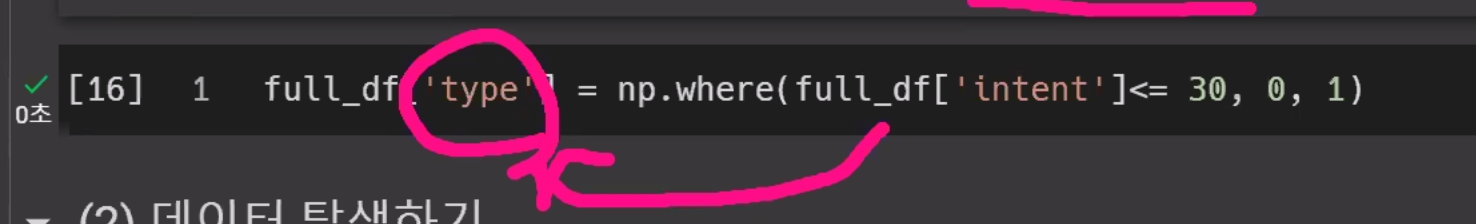

In [ ]:
type = [0]*len(common_df) + [1]*len(faq_df)
faq['type'] = type

In [ ]:
faq.head()

,intent,Q,A,type
0,1,떨어뜨려서 핸드폰 액정 나갔어,as 맡기세요.,0
1,2,액정 나갔어,as 맡기세요.,0
2,3,핸드폰 떨어뜨려서 고장 났나봐,as 맡기세요.,0
3,4,노트북이 작동이 안되네,AS센터에 맡겨보세요.,0
4,5,노트북 키보드가 안먹히네,AS센터에 맡겨보세요.,0


### (2) 데이터 탐색하기


* 세부 요구사항
    - intent별 질문 개수 분포를 확인합니다.
        * 문의 유형별 길이에 대한 기초통계량과  시각화(히스토그램, 박스플롯 등)를 통해 분포를 확인합니다.
    - 질문별 문장 길이 분포를 확인합니다.

#### 1) intent별 질문 개수 살펴보기
* intent 별 데이터 개수를 bar plot 등을 이용하여 시각화 합니다.

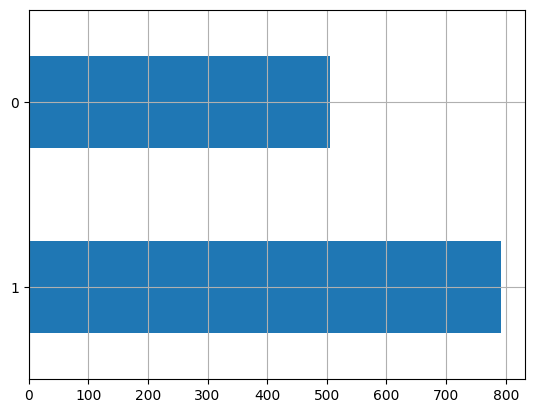

In [ ]:
faq['type'].value_counts().plot(kind='barh')
plt.grid()

#### 2) 질문별 문장 길이 분포
* 질문 별 문장 길이(글자 수)를 추출하여 분포를 살펴봅시다.
    * 기초 통계량
    * 히스토그램 및 박스 플롯으로 분포를 살펴봅니다.

In [ ]:
Q_len = []
for i in faq['Q']:
    Q_len.append(len(i))
faq['Q_len'] = Q_len
faq.tail()

,intent,Q,A,type,Q_len
1293,138,KT 에이블스쿨만의 장점이 무엇인지 상세히 설명해주세요,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,30
1294,138,다른 교육과의 차이점은 무엇인가요?,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,19
1295,138,다른 교육과 차이점이 있나요?,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,16
1296,1297,다른 국비 지원 교육보다 특별한 점이 있는지 궁금해요,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,29
1297,1298,다른 교육보다 특별한 것이 있나요?,KT 에이블스쿨에서는 이론/실습 교육에 나아가 기업 실전형 프로젝트를 중심으로 실무...,1,19


In [ ]:
faq['Q_len'].describe()

count    1298.000000
mean       18.246533
std        10.605533
min         3.000000
25%        11.000000
50%        16.000000
75%        23.000000
max       127.000000
Name: Q_len, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f22f112ac10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22f113c190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22f112a970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f22f113c6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f22f113c970>],
 'means': []}

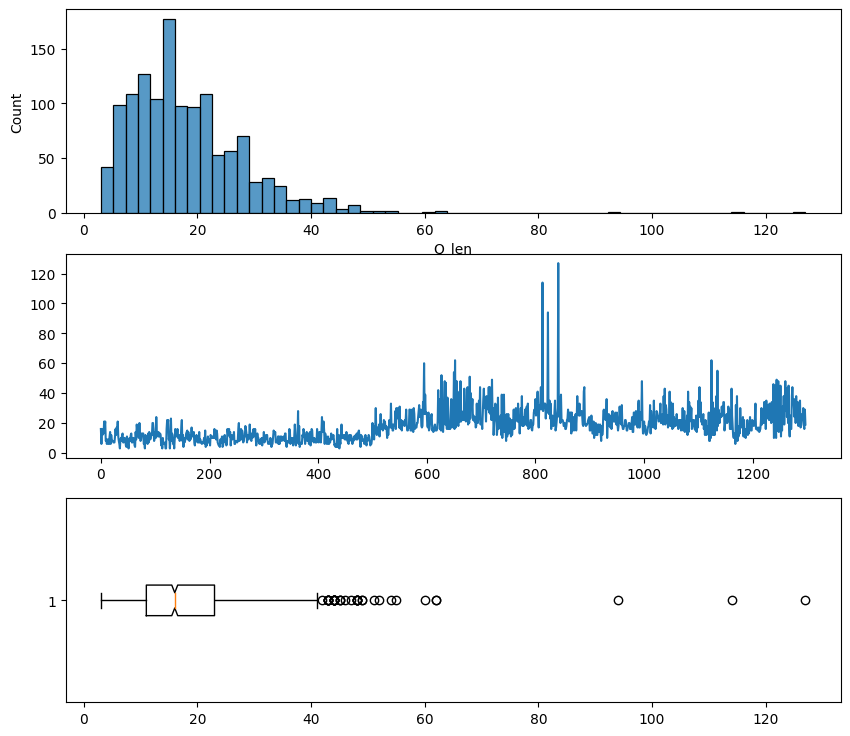

In [ ]:
plt.figure(figsize=(10, 9))
plt.subplot(311)
sns.histplot(faq['Q_len'])

plt.subplot(312)
plt.plot(faq['Q_len'])

plt.subplot(313)
plt.boxplot(faq['Q_len'], notch=1, vert=0)

#### 3) 대화 유형(type) 별 문장 길이 분포 비교
* 타입별 문장 길이(글자 수)를 추출하여 분포를 살펴봅시다.
    * 기초 통계량
    * 히스토그램 및 박스 플롯으로 분포를 살펴봅니다.

faq: intent = 0


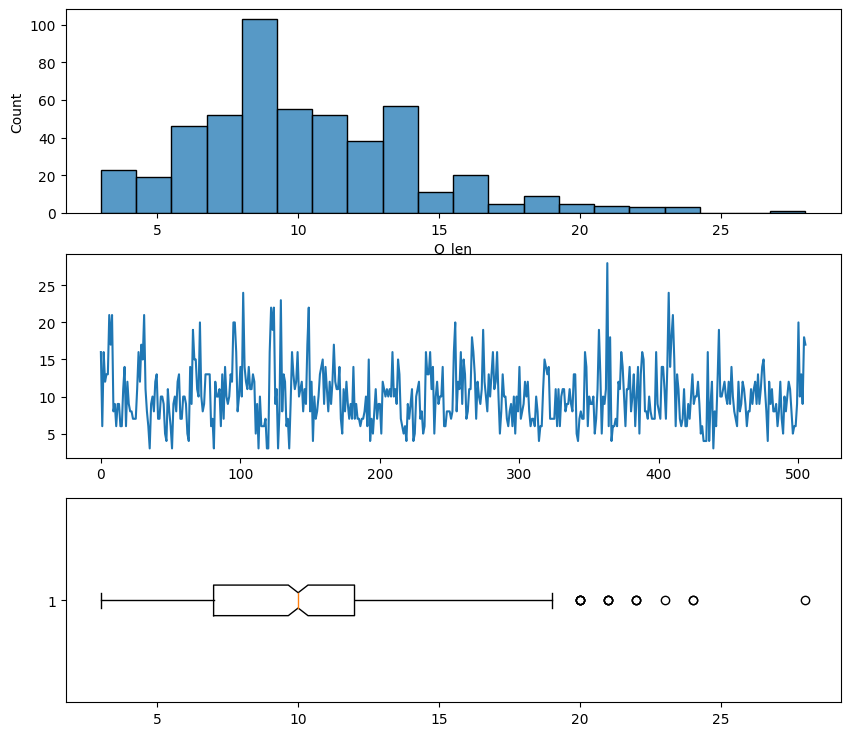

In [ ]:
temp = faq.loc[faq['type'] == 0]

plt.figure(figsize=(10, 9))
plt.subplot(311)
sns.histplot(temp['Q_len'])

plt.subplot(312)
plt.plot(temp['Q_len'])

plt.subplot(313)
plt.boxplot(temp['Q_len'], notch=1, vert=0)

print('faq: intent = 0')

faq: intent = 1


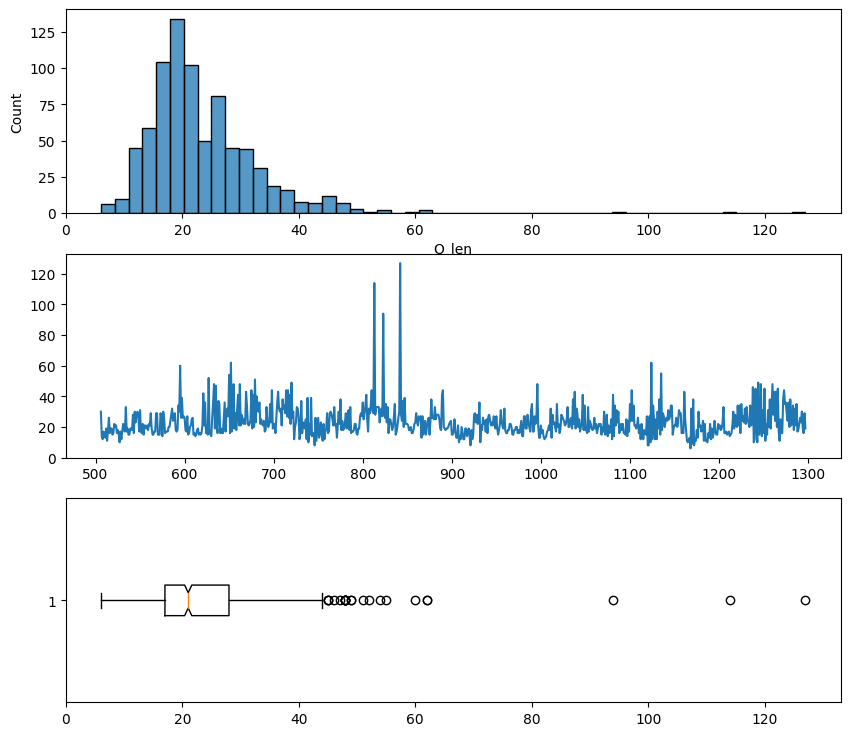

In [ ]:
temp = faq.loc[faq['type'] == 1]
plt.figure(figsize=(10, 9))
plt.subplot(311)
sns.histplot(temp['Q_len'])

plt.subplot(312)
plt.plot(temp['Q_len'])

plt.subplot(313)
plt.boxplot(temp['Q_len'], notch=1, vert=0)

print('faq: intent = 1')

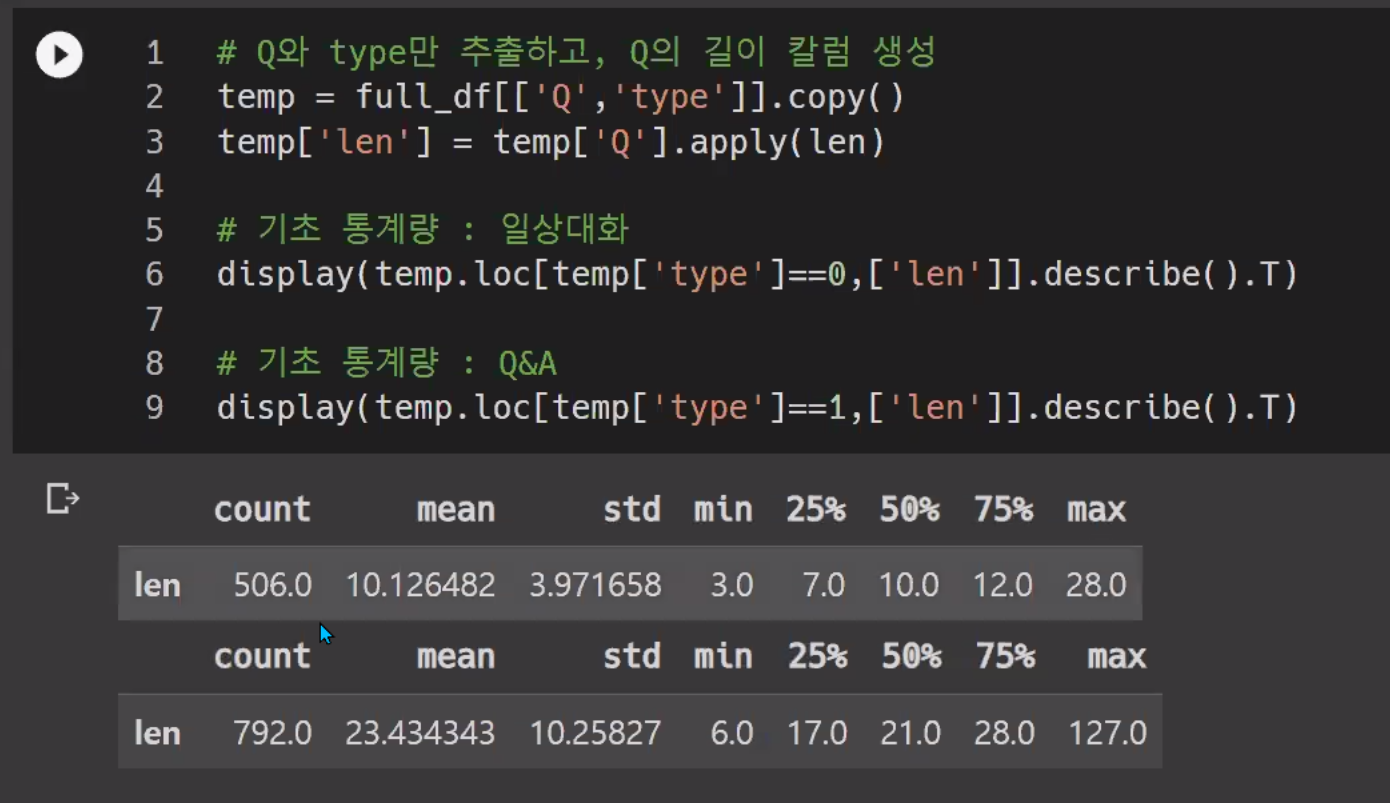

## 3.데이터 전처리

* 세부요구사항
    * 다음 항목에 해당되는 전처리 함수를 각각 생성하여 하나로 합쳐봅시다.
        * 특수문자 제거 : 정규 표현식을 활용합니다. (띄어쓰기, \n 등)
        * 형태소 분석기 사용 : konlpy(mecab, kkma, Okt, etc), soynlp, khaiii 등 여러 형태소 분석기를 활용합니다.
    * 문장길이를 조절하여 모델 input으로 활용하기
    * joblib.dump를 이용하여 전처리 결과 데이터를 저장합니다.

### (1) 학습/평가 데이터 분리
   * test 데이터 : intent마다 무작위로 질문 2개를 뽑아 test 데이터로 분리
   * train 데이터 : 나머지 데이터


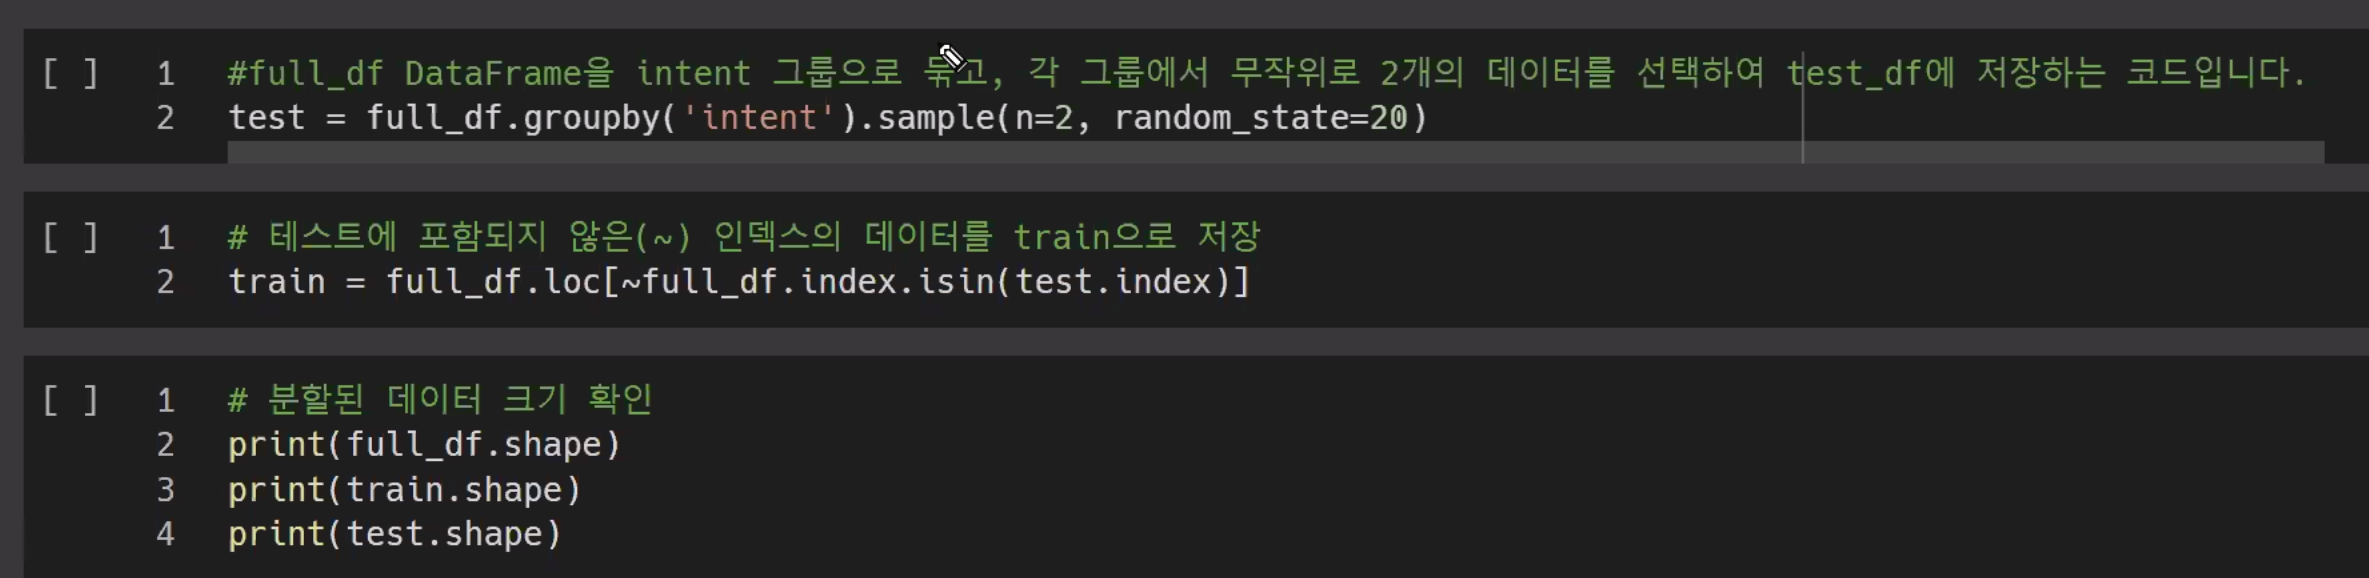

In [ ]:
test = faq.sample(n=2) # 무작위로 두 row 추출
train = faq.drop(test.index) # 해당 row 제외한 데이터프레임

train.head()

,intent,Q,A,type,Q_len
0,0,떨어뜨려서 핸드폰 액정 나갔어,as 맡기세요.,0,16
1,0,액정 나갔어,as 맡기세요.,0,6
2,0,핸드폰 떨어뜨려서 고장 났나봐,as 맡기세요.,0,16
3,1,노트북이 작동이 안되네,AS센터에 맡겨보세요.,0,12
4,1,노트북 키보드가 안먹히네,AS센터에 맡겨보세요.,0,13


In [ ]:
len(train)

1296

### (2) 형태소 분석하기
- konlpy, mecab 설치 후 형태소 분석 함수 생성
    * [코랩]아래 두 코드셀을 순차적으로 실행하면 설치 됩니다.
        * 참조 : https://konlpy.org/en/latest/install/
- 형태소 분석 결과를 다음의 이름으로 생성하시오.
    - clean_train_questions
    - clean_test_questions

#### 1) 형태소 분석 패키지 설치

In [ ]:
# mecab 설치를 위한 관련 패키지 설치
!apt-get install curl git
!apt-get install build-essential
!apt-get install cmake
!apt-get install g++
!apt-get install flex
!apt-get install bison
!apt-get install python-dev
!pip install cython
!pip install mecab-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.68.0-1ubuntu2.18).
git is already the newest version (1:2.25.1-1ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Rea

In [ ]:
# 형태소 기반 토크나이징 (Konlpy)
!python3 -m pip install konlpy
# mecab (ubuntu: linux, mac os 기준)
# 다른 os 설치 방법 및 자세한 내용은 다음 참고: https://konlpy.org/ko/latest/install/#id1
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


#### 2) 형태소 분석을 위한 함수를 제공합니다.

In [ ]:
from konlpy.tag import Okt, Komoran, Mecab, Hannanum, Kkma

# 다양한 토크나이저를 사용할 수 있는 함수
def get_tokenizer(tokenizer_name):
    if tokenizer_name == "komoran":
        tokenizer = Komoran()
    elif tokenizer_name == "okt":
        tokenizer = Okt()
    elif tokenizer_name == "mecab":
        tokenizer = Mecab()
    elif tokenizer_name == "hannanum":
        tokenizer = Hannanum()
    else:
        # "kkma":
        tokenizer = Kkma()
        
    return tokenizer

In [ ]:
# 형태소 분석을 수행하는 함수

def tokenize(tokenizer_name, original_sent, nouns=False):
    # 미리 정의된 몇 가지 tokenizer 중 하나를 선택
    tokenizer = get_tokenizer(tokenizer_name)

    # tokenizer를 이용하여 original_sent를 토큰화하여 tokenized_sent에 저장하고, 이를 반환합니다.
    sentence = original_sent.replace('\n', '').strip()
    if nouns:       
        # tokenizer.nouns(sentence) -> 명사만 추출
        tokens = tokenizer.nouns(sentence)
    else:
        tokens = tokenizer.morphs(sentence)
    tokenized_sent = tokens
    
    return tokenized_sent

#### 3) 형태소 분석 테스트
* 몇개 데이터에 대해 형태소 분석 확인하기

In [ ]:
%%time
# train의 질문들을 리스트로 변환
raw_sentences = list(train['Q'])

# train_sentences 리스트 생성 
train_sentences = []

# raw_sentences에서 하나씩 가져와 토큰화하며 추가하기
for sent in raw_sentences:
    # 토크나이즈 함수를 통해 'mecab' 형태소 분석기를 이용해 문장 토큰화
    # split 함수를 이용해 토큰화된 단어들을 리스트로 만들어 추가
    train_sentences.append(tokenize('mecab', sent)) # .split(' ')

# train_sentences에서 처음 다섯개의 리스트를 출력
print(train_sentences[:5])

[['떨어뜨려서', '핸드폰', '액정', '나갔', '어'], ['액정', '나갔', '어'], ['핸드폰', '떨어뜨려서', '고장', '났', '나', '봐'], ['노트북', '이', '작동', '이', '안', '되', '네'], ['노트북', '키보드', '가', '안', '먹히', '네']]
CPU times: user 855 ms, sys: 640 ms, total: 1.5 s
Wall time: 1.51 s


In [ ]:
# word2vec으로 임베딩할때, 워드 벡터의 차원 수를 지정하는 변수로, 100이 기본값
SIZE = 100
# word2vec 모델에서 한 단어의 좌우에 있는 최대 단어 개수를 지정하는 변수로 3으로 지정되어 있음
WINDOW = 3
# word2vec 모델에 의해 무시될 최소 단어 빈도 수, 해당 값보다 적게 나타나는 단어는 무시됨됨
MIN_COUNT = 5

In [ ]:
from gensim.models import Word2Vec

#Word2Vec 모델 생성
wv_model = Word2Vec(train_sentences, # 학습할 문장
                    size = SIZE, # 워드 임베딩 벡터의 크기
                    window = WINDOW, # 문맥 윈도우 크기
                    max_vocab_size = 500, # 학습에 사용할 최대 단어 수 
                    min_count = MIN_COUNT, # 학습에 사용할 최소 단어 수
                    workers = 4, # 학습을 위한 프로세스 수
                    iter = 10, # 학습 횟수
                    sg = 1) # Skip-Gram 방식을 사용
                    

In [ ]:
# Word2Vec 모델로부터 하나의 문장을 벡터화시키는 함수 
def get_sent_embedding(model, embedding_size, tokenized_words):
    # 임베딩 벡터를 0으로 초기화
    feature_vec = np.zeros((embedding_size, ), dtype='float32')
    # 단어 개수 초기화
    n_words = 0
    index2word_set = set(model.wv.index2word) 
    # 문장의 단어들을 하나씩 반복
    for word in tokenized_words:
        # 모델 단어 집합에 해당하는 단어일 경우에만
        if word in index2word_set:
            # 단어 개수 1 증가
            n_words += 1
            # 임베딩 벡터에 해당 단어의 벡터를 더함
            feature_vec = np.add(feature_vec, model[word])
    # 단어의 개수가 0보다 큰 경우 벡터를 단어 개수로 나누어줌 (평균 임베딩 벡터 계산)
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
# 문장벡터 데이터 셋 만들기
def get_dataset(sentences, model, num_features):
    dataset = list()

    # 각 문장을 벡터화해서 리스트에 저장
    for sent in sentences:
        dataset.append(get_sent_embedding(model, num_features, sent))

    # 리스트를 numpy 배열로 변환하여 반환
    sent_embedding_vectors = np.stack(dataset)

    return sent_embedding_vectors

In [ ]:
# 학습 데이터의 문장들을 Word2Vec 모델을 사용해 벡터화
train_data_vecs = get_dataset(train_sentences, wv_model, SIZE)
train_data_vecs.shape

<ipython-input-59-58764feaf1b1>:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vec = np.add(feature_vec, model[word])


(1296, 100)

In [ ]:
x = train_data_vecs
y = np.array(list(train['intent']))

# train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
display(np.unique(y_val, return_counts=True))
display(np.unique(y_val, return_counts=True)[1].shape)

# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
# display(np.unique(y_val, return_counts=True))
# display(np.unique(y_val, return_counts=True)[1].shape)

(array([  1,   3,   4,   5,   6,   7,   8,   9,  10,  13,  20,  22,  24,
         28,  30,  32,  34,  35,  36,  37,  39,  40,  41,  44,  46,  47,
         50,  51,  52,  53,  55,  57,  58,  60,  62,  64,  65,  69,  70,
         72,  73,  75,  76,  77,  81,  82,  85,  86,  87,  88,  89,  90,
         91,  93,  96,  97,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 128, 136, 138]),
 array([ 1,  2,  3,  1,  8,  1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,
         2,  1,  1,  2,  2,  3,  3,  1,  1,  1,  1,  2,  1,  3,  1,  2,  1,
         1,  2,  3,  2,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         1,  2,  5,  2,  1,  1,  3,  1,  1,  5,  1, 29,  1,  4,  6,  5,  3,
         4, 16,  3,  3,  6,  3,  9,  2, 10, 15,  3,  4,  5,  7,  2,  3,  5,
         1,  1]))

(87,)

In [ ]:
faq.head(10)

,intent,Q,A,type,Q_len
0,0,떨어뜨려서 핸드폰 액정 나갔어,as 맡기세요.,0,16
1,0,액정 나갔어,as 맡기세요.,0,6
2,0,핸드폰 떨어뜨려서 고장 났나봐,as 맡기세요.,0,16
3,1,노트북이 작동이 안되네,AS센터에 맡겨보세요.,0,12
4,1,노트북 키보드가 안먹히네,AS센터에 맡겨보세요.,0,13
5,1,노트북 전원이 안들어와.,AS센터에 맡겨보세요.,0,13
6,1,노트북을 떨어뜨려서 고장 난 것 같아.,AS센터에 맡겨보세요.,0,21
7,1,컴퓨터가 제대로 작동하지 않아요,AS센터에 맡겨보세요.,0,17
8,1,컴퓨터가 에러 메시지를 띄우고 있어요.,AS센터에 맡겨보세요.,0,21
9,1,컴터 고장났나봐,AS센터에 맡겨보세요.,0,8


#### 4) train, test의 Q에 대해 형태소 분석하여 저장하기
* 데이터프레임의 각 행 별로 함수를 적용하는 방법
    * .apply(lambda ..........) 를 활용하면 손쉽게 처리할수 있습니다.

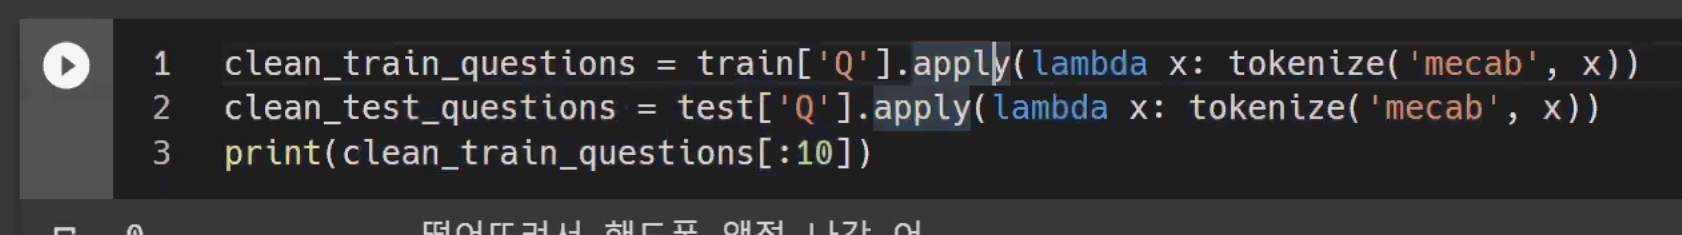

In [ ]:
%%time
clean_train_questions = train['Q'].apply(lambda x: tokenize('mecab', x))
clean_test_questions = test['A'].apply(lambda x: tokenize('mecab', x))
print(clean_train_questions[:10])

0                  [떨어뜨려서, 핸드폰, 액정, 나갔, 어]
1                              [액정, 나갔, 어]
2                [핸드폰, 떨어뜨려서, 고장, 났, 나, 봐]
3                 [노트북, 이, 작동, 이, 안, 되, 네]
4                  [노트북, 키보드, 가, 안, 먹히, 네]
5                  [노트북, 전원, 이, 안, 들어와, .]
6       [노트북, 을, 떨어뜨려서, 고장, 난, 것, 같, 아, .]
7           [컴퓨터, 가, 제대로, 작동, 하, 지, 않, 아요]
8    [컴퓨터, 가, 에러, 메시지, 를, 띄우, 고, 있, 어요, .]
9                        [컴, 터, 고장났, 나, 봐]
Name: Q, dtype: object
CPU times: user 867 ms, sys: 636 ms, total: 1.5 s
Wall time: 1.51 s


In [ ]:
test = faq.sample(n=2) # 무작위로 두 row 추출
train = faq.drop(test.index) # 해당 row 제외한 데이터프레임임

train.head()

,intent,Q,A,type,Q_len
0,0,떨어뜨려서 핸드폰 액정 나갔어,as 맡기세요.,0,16
1,0,액정 나갔어,as 맡기세요.,0,6
2,0,핸드폰 떨어뜨려서 고장 났나봐,as 맡기세요.,0,16
3,1,노트북이 작동이 안되네,AS센터에 맡겨보세요.,0,12
4,1,노트북 키보드가 안먹히네,AS센터에 맡겨보세요.,0,13


### (3) 전처리 완료된 데이터를 파일로 저장하기
- 총 4개의 파일을 저장합니다.
    * train 셋
    * test 셋
    * 전처리된 데이터
        * clean_train_questions
        * clean_test_questions
- 저장방법
    * joblib 라이브러리를 이용하여 저장합니다.

In [ ]:
train.head()

,intent,Q,A,type,Q_len
0,0,떨어뜨려서 핸드폰 액정 나갔어,as 맡기세요.,0,16
1,0,액정 나갔어,as 맡기세요.,0,6
2,0,핸드폰 떨어뜨려서 고장 났나봐,as 맡기세요.,0,16
3,1,노트북이 작동이 안되네,AS센터에 맡겨보세요.,0,12
4,1,노트북 키보드가 안먹히네,AS센터에 맡겨보세요.,0,13


In [ ]:
joblib.dump(train, path+'/train.joblib')
joblib.dump(test, path+'/test.joblib')

joblib.dump(clean_train_questions, path+'/clean_train_questions.joblib')
joblib.dump(clean_test_questions, path+'/clean_test_questions.joblib')

['/content/drive/MyDrive/AIVLE/4월/mini6/clean_test_questions.joblib']

In [ ]:
    from lightgbm import LGBMClassifier

    model = LGBMClassifier()

    model.fit(x_train, y_train)

    y_pred = model.predict(x_val)

    y_pred

array([105,  70, 123, 117, 123, 117,  22, 105, 114,  22, 108, 121, 108,
        65, 120,   6,  93, 108, 105,   1,  52, 117, 119,  21,  99, 113,
       124,  22, 112,  34, 128,  90, 138, 112, 105,   6,  34, 120,  90,
       104,  22, 115,  65, 105, 115, 115, 107,  75, 118, 109,   6, 105,
       122, 120, 115,   3,  34, 123, 105,   5, 105,   6,  39, 124, 122,
        69, 112, 113,  72, 105, 110, 121,   6, 105, 120, 116, 120, 120,
        87, 112, 117,  32, 118, 112,  69, 107, 121, 105,  65, 112, 105,
       125, 105,  87, 105,  47, 112, 101,  57,  68,  22, 118,  27,  91,
        79, 121, 123, 108,  39,  21,  68, 105, 108,   6, 105, 107, 105,
       103, 105, 112, 103, 115,   4,  80,  91, 103,  37, 119,  22,  52,
       119, 105, 117, 109, 112, 105, 100,  65,  84, 111, 103,   6, 122,
       115, 119, 121, 105,   3, 106, 100,  27,  70,  17,  90,   6,   6,
       105,  41,  34, 115, 103,   6, 112,   1, 105,  69,  93,  90,   6,
       111, 114,  52, 108, 131, 125, 117,  39, 120, 105, 119, 11

In [ ]:
from sklearn.metrics import *
precision_score(y_val, y_pred, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2828546882670594

In [ ]:
    a = rand.randrange(0, len(train))

    a = [tokenize(get_tokenizer('mecab'), a)]

    # 토큰화된 데이터를 입력으로 사용하여 Word2Vec 모델 학습
    wv_model = Word2Vec(a, size=100, window=5, min_count=1, workers=4, sg=1)

    # 학습된 Word2Vec 모델을 사용하여 데이터셋 구성
    inputQuestion = get_dataset(a, wv_model, 100)

    import random

    predicted_intent = model.predict(inputQuestion)

    # 예측된 intent에 해당하는 답변들의 리스트 가져오기
    response_options = faq[faq['intent'] == predicted_intent[0]]['A'].tolist()

    # 답변들 중에서 랜덤하게 하나 선택
    response = random.choice(response_options)

    print("답변:", response)

행복해요


답변: 힘들겠어요.


<ipython-input-79-58764feaf1b1>:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vec = np.add(feature_vec, model[word])


답변: 힘들겠어요.
